# Implementation of nucleation model
### Kinetics
#### Barbed ends
- Elongate from monomers in solution
- Get capped by capping protein in solution
- Tether to empty WH2 domains
- Dissociate from empty WH2 domains
- Tether to WH2 domains occupied by actin monomers
- Tethering to WH2 domains is inhibited by capping protein
- Tether to Arp2/3 complexes bound to CA domains, allowed by capping protein
- Barbed ends dissociate from CA-bound Arp2/3 complexes at 10 /s 97% of the time, at 1 /s 2% of the time, and then take Arp2/3 with them at 1 /s 1% of the time; daughter branches are nucleated in the last scenario
- Tethering to Arp2/3 complex precedes tethering to WH2 domains (empty and occupied)
- Tethering rates are proportional to the inverse squared distance to nucleation promoting factors

#### Nucleation promoting factors
- Fixed positions on the xy-plane
- Possess WH2 and CA domains
- WH2 domains can be occupied by actin monomers from solution
- CA domains can be occupied by Arp2/3 complexes from solution

In [1]:
%load_ext line_profiler
from nucleation import *

In [2]:
actin_network = Network()
actin_network.total_time = 20.0

In [3]:
%lprun -f actin_network.simulate actin_network.simulate()

Timer unit: 1e-06 s

Total time: 1333.02 s
File: /home/jiongyi/github/postdoc/actin_assembly/simulation/tan_mullins/nucleation.py
Function: simulate at line 305

Line #      Hits         Time  Per Hit   % Time  Line Contents
   305                                               def simulate(self):
   306    115433     125230.0      1.1      0.0          while self.current_time < self.total_time:
   307    115432 1329605259.0  11518.5     99.7              self.gillespie_step()
   308    115432    3293472.0     28.5      0.2              self.barbed_xyz_mat[:, 2] -= self.barbed_xyz_mat[:, 2].min()

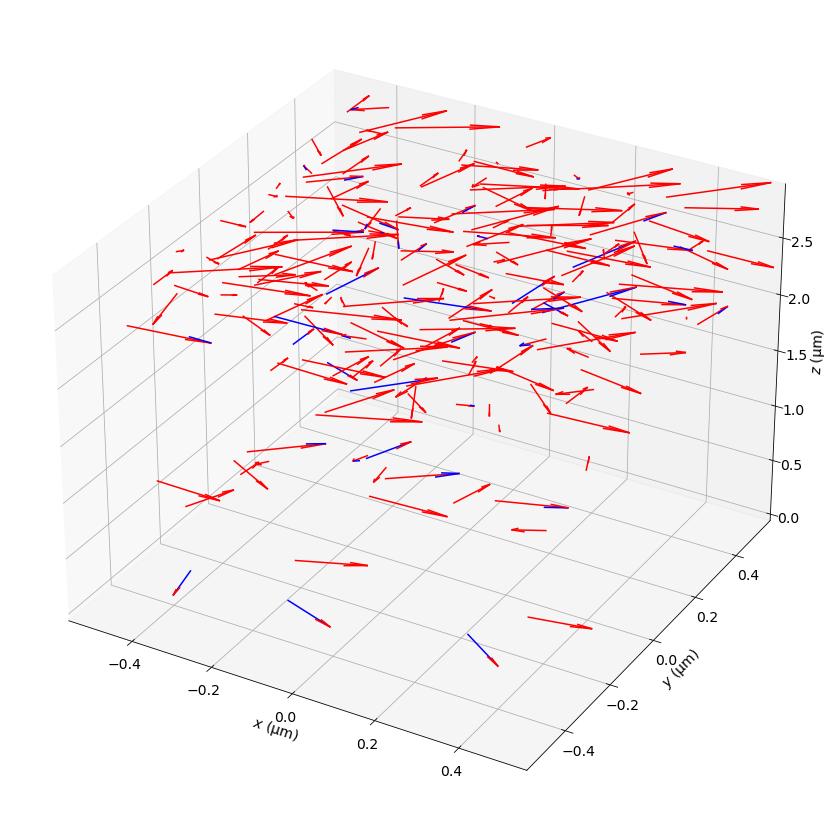

In [20]:
fig1_hand, axes1_hand = actin_network.display()
fig1_hand.set_figwidth(15)
fig1_hand.set_figheight(15)
axes1_hand.set_xlabel("$x$ ($\mathrm{\mu m}$)", fontsize=14)
axes1_hand.set_ylabel("$y$ ($\mathrm{\mu m}$)", fontsize=14)
axes1_hand.set_zlabel("$z$ ($\mathrm{\mu m}$)", fontsize=14)
axes1_hand.tick_params(labelsize=14)

In [19]:
actin_network.no_barbed

212